# Problem Statement


X Education, an online course selling education company, needs assistance in recognising and selecting promising leads that will most likely convert to paying customers. Our aim is to analyse and identify variables which leads to higher customer conversion rate.  This is done by assigning lead scores to each of the leads such that customers with high lead score indicate high chance of conversion.


# Workflow
- Step 1 : Importing the data set
- Step 2 : Inspecting the dataframe
- Step 3 : Handling missing values
- Step 4 : Data Preparation
- Step 5 : Outlier Treatment for continuous variables
- Step 6 : EDA
- Step 7 : Creating dummy variables for categorical columns
- Step 8 : Splitting the Data into Training and Testing Sets
- Step 9 : Feature scaling
- Step 10 : First Training Model
- Step 11 : Feature Selection Using RFE
- Step 12 : Model Building
- Step 13 : Model Evaluation: Accuracy, Sensitivity, and Specificity
- Step 14 : Plotting the ROC Curve
- Step 15 : Finding Optimal Cut-off Point
- Step 16 : Making predictions on the test set
- Step 17 : Adding lead score to the data file
- Conclusions





In [2]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing packages
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import sklearn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns",500)

# Step 1 : Importing the data set

In [6]:
# reading data 
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2 : Inspecting the dataframe

In [7]:
df.shape

(9240, 37)

In [8]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
#checking for duplicates
dup = df.copy()
dup.drop_duplicates(inplace = True)
dup.shape

(9240, 37)

Shape is unchanged - impying that there is no duplicates in the dataset

# Step 3 : Handling missing values

In [10]:
#Converting 'Select' values to NaN as customer has not selected the option.
df = df.replace('Select',np.nan)

In [11]:
# checking for missing values (percentage)
round(100*df.isnull().sum()/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# dropping columns with 45 or more than 45 missing value percentage.

columns = df.columns #column names of df

for i in columns:
    if round(100*df[i].isnull().sum()/df.shape[0],2) >= 45:
        df.drop(i,1,inplace = True)

In [13]:
df.shape  #7 columns have been dropped

(9240, 30)

In [14]:
# city
#lets have a look at the entries of column city as it has the highest missing value percentage 
df.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- Since the count of missing values is higher than the mode (Mumbai) we do not want to impute the missing values with mode. So  dropping this column from df

In [15]:
df.drop('City',1,inplace = True)

In [16]:
# specialization
# checking the entries in specialization column
df.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- Here also the missing value count is higher than the mode(Finance Management ), So we do not want to impute the missing values with mode. Since we think this is a relevant column, we do not want to drop this column either. So we will replace the missing values as 'Not mentioned'.


In [17]:
df.Specialization = df.Specialization.replace(np.nan,'Not mentioned')

In [18]:
# tags
# let's check the entries in tags
df.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [19]:
# replacing np.nan with 'Not specified'
df.Tags = df.Tags.replace(np.nan, 'Not specified')

In [20]:
# grouping categories having less than 100 counts to remove the bias while building the model
df.Tags = df.Tags.replace(['invalid number','Diploma holder (Not Eligible)',
                           'wrong number given','opp hangup','number not provided',
                           'in touch with EINS','Lost to Others','Still Thinking',
                           'Want to take admission but has financial problems',
                           'In confusion whether part time or DLP','Interested in Next batch',
                           'Lateral student','Shall take in the next coming month',
                           'University not recognized','Recognition issue (DEC approval)'],'Others')

In [21]:
#  'What matters most to you in choosing a course '
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Since we have very high number of missing values and  there are only 3 customers  who have chosen categories other than 'Better Career Prospects',  let's remove this column

In [22]:
df.drop('What matters most to you in choosing a course',axis = 1, inplace = True)

In [23]:
df.shape

(9240, 28)

In [24]:
# checking entries in 'What is your current occupation' column
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
# replacing the missing values with 'Not mentioned'
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan,'Not mentioned')

In [26]:
# Since the number of Housewives and Businessmen are very low, let's combine them with 'Other'
df['What is your current occupation'] = df['What is your current occupation'].replace(['Businessman',
                                                                                      'Housewife'],'Other') 

In [27]:
# checking the entries in 'country' column
df.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [28]:
#let's have a look at the proportion of each country in the column 'Country'
df.Country.value_counts(dropna=False,normalize = True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

- Since more than 96% of the customers are either from India or have not mentioned their country, this column is of not much use.So let's drop this column

In [29]:
df.drop('Country',1,inplace = True)
df.shape

(9240, 27)

In [30]:
# describing 'TotalVisits' column
df.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

- Here the mean and median of Totalvisits are nearly same
- so we can assume that it follows a normal curve and impute the missing values with mean
- But here the totalvisits is a count and it has to be a natural number, so imputting the missing value with median

In [31]:
df.TotalVisits = df.TotalVisits.replace(np.nan, df.TotalVisits.median())

In [32]:
# describing 'Page Views Per Visit'
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [33]:
df['Page Views Per Visit'].quantile(.99)

9.0

- Mean and median are very close 
- But there is a huge gap between 99th percentile and maximum value indicating presence of outliers 
- So imputing the missing values with median

In [34]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan,df['Page Views Per Visit'].median())

In [35]:
# checking the entries in 'Last Activity' column
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

- Let's replace the NaN values with mode 'Email Opened'
- Grouping categories with less than 100 count

In [36]:
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')

In [37]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                  'Approached upfront','View in browser link Clicked',
                                                  'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                  'Resubscribed to emails'],'Others')

In [38]:
# checking entries in 'Lead Source' column
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- Replacing NaN values with mode 'Google'
- Replacing 'google' with 'Google'
- Grouping categories with less than 100 counts to 'Others'

In [39]:
df['Lead Source'] = df['Lead Source'].replace([np.nan,'google'],'Google')

In [40]:
df['Lead Source'] = df['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release',
                                               'Social Media','Live Chat','youtubechannel','testone',
                                              'Pay per Click Ads','welearnblog_Home','WeLearn','blog',
                                              'NC_EDM'], 'Others')

In [41]:
#missing values
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

- All the missing values in the dataframe have been taken care of

# Step 4:  Data Preparation

In [42]:
# Columns in our dataframe df
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

-  we can drop 'Prospect ID' and 'Lead Number' as we do not fit these on the model

In [43]:
df.drop(['Prospect ID', 'Lead Number'],1,inplace = True)

In [44]:
# creating an empty list to add all the column names which needs to dropped from the dataframe
columns_to_drop = []

#### Let's go through each column one by one to check if any of them needs to be dropped/modified

In [45]:
# column -'Do Not Email'
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [46]:
# column- 'Do Not Call'
df['Do Not Call'].value_counts() 

No     9238
Yes       2
Name: Do Not Call, dtype: int64

- adding 'Do Not Call' to columns_to_drop since almost every customer selected 'No'

In [47]:
columns_to_drop.append('Do Not Call')

In [48]:
# column - 'Last Activity'
df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [49]:
# # column - 'Specialization'
df['Specialization'].value_counts()

Not mentioned                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [50]:
# let's group all the Management specializations and Business specializations to Management and Business domains respectively
df['Specialization'] = df['Specialization'].replace(['Finance Management', 'Human Resource Management',
                                                          'Marketing Management', 'Operations Management',
                                                          'IT Projects Management', 'Supply Chain Management',
                                                          'Healthcare Management', 'Hospitality Management',
                                                          'Retail Management'], 'Management Specializations')
# Business Specialization
df['Specialization'] = df['Specialization'].replace(['International Business', 'Rural and Agribusiness',
                                                          'E-Business'], 'Business Specializations')

In [51]:
# column - 'What is your current occupation'
df['What is your current occupation'].value_counts()

Unemployed              5600
Not mentioned           2690
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [52]:
# column - 'Search'
df.Search.value_counts() 

No     9226
Yes      14
Name: Search, dtype: int64

In [53]:
# adding 'Search' to columns_to_drop since almost every customer selected 'No'
columns_to_drop.append('Search')
columns_to_drop

['Do Not Call', 'Search']

In [54]:
# column - Magazine
df.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

In [55]:
# adding 'Magazine' to columns_to_drop since every customer selected 'No'
columns_to_drop.append('Magazine')
columns_to_drop

['Do Not Call', 'Search', 'Magazine']

In [56]:
# column - 'Newspaper Article'
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [57]:
# adding 'Newspaper Article' to columns_to_drop since almost every customer selected 'No'
columns_to_drop.append('Newspaper Article')
columns_to_drop

['Do Not Call', 'Search', 'Magazine', 'Newspaper Article']

In [58]:
# column - 'X Education Forums'
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [59]:
# adding 'X Education Forums' to columns_to_drop since almost every customer selected 'No'
columns_to_drop.append('X Education Forums')
columns_to_drop

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums']

In [60]:
# column - 'Newspaper'
df.Newspaper.value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [61]:
# adding 'Newspaper' to columns_to_drop since almost every customer selected 'No'
columns_to_drop.append('Newspaper')
columns_to_drop

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper']

In [62]:
# column - 'Digital Advertisement'
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [63]:
# adding 'Digital Advertisement' to columns_to_drop since almost every customer selected 'No'
columns_to_drop.append('Digital Advertisement')
columns_to_drop

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

In [64]:
# column - 'Through Recommendations'
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [65]:
# adding 'Through Recommendations' to columns_to_drop since almost every customer selected 'No'
columns_to_drop.append('Through Recommendations')
columns_to_drop

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [66]:
# column - 'Receive More Updates About Our Courses'
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [67]:
# adding 'Receive More Updates About Our Courses' to columns_to_drop since  every customer selected 'No'
columns_to_drop.append('Receive More Updates About Our Courses')

In [68]:
# column - 'Tags'
df.Tags.value_counts()

Not specified                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [69]:
# column - 'Update me on Supply Chain Content'
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [70]:
# adding 'Update me on Supply Chain Content' to columns_to_drop since  every customer selected 'No'
columns_to_drop.append('Update me on Supply Chain Content')

In [71]:
# column - 'Get updates on DM Content'
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [72]:
# adding 'Get updates on DM Content' to columns_to_drop since  every customer selected 'No'
columns_to_drop.append('Get updates on DM Content')

In [73]:
# column -'I agree to pay the amount through cheque'
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [74]:
# adding 'I agree to pay the amount through cheque' to columns_to_drop since  every customer selected 'No'
columns_to_drop.append('I agree to pay the amount through cheque')

In [75]:
# column -'A free copy of Mastering The Interview'
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [76]:
# column - 'Last Notable Activity'
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [77]:
# Grouping 'Last Notable Activity' levels  with low count into 'Others' in order to remove bias
df['Last Notable Activity']  = df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                   'Had a Phone Conversation','Email Marked Spam',
                                                                    'Approached upfront','Resubscribed to emails',
                                                                   'View in browser link Clicked','Form Submitted on Website',
                                                                   'Email Received'],'Others')

In [78]:
columns_to_drop

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [79]:
# dropping columns_to_drop from our dataframe
df.drop(columns_to_drop,1,inplace = True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

#### Understanding the variable types

In [81]:
# Binary type - 'Converted','Do Not Email','A free copy of Mastering The Interview'
# Categorical type -'Lead Origin','Lead Source','Last Activity','Specialization',
#                    'What is your current occupation','Tags','Last Notable Activity'
# Numerical type - 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'

#### Converting  binary variables with Yes/No values  to 0/1

In [82]:
# List of variables to map
l1 = ['Do Not Email','A free copy of Mastering The Interview']
# Defining the map function
def map_func(x):
    return x.map({'Yes':1,'No':0})

df[l1] = df[l1].apply(map_func)

# Step 5 :Outlier Treatment for continuous variables 

In [83]:
# Numerical- continuous variables - 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'

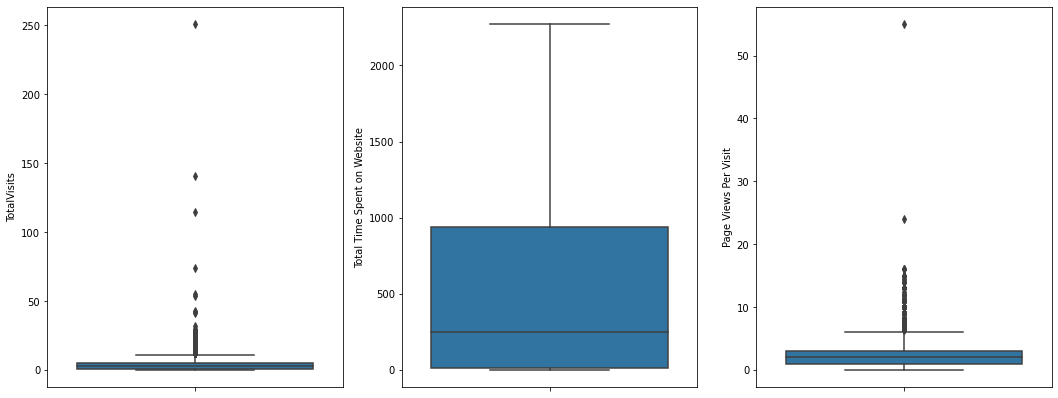

In [84]:
# Drawing box plots for indepent variables with continuous values
col1 = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(18,7))
i = 1
for column in col1:
    plt.subplot(1,3,i)
    sns.boxplot(y=column, data = df)
    i +=1

Both 'TotalVisits' and 'Page Views Per Visit' seem to have outliers on the upper side

In [85]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df[col1].describe(percentiles = [.25,.5,.75,.9,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


- TotalVisits
    - Mean and median are close to each other
    - From minimum value the Percentile values gradally increase until 99th percentile
    - Huge gap between 99th percentile and maximum value -> indicating the presence of outliers above upper fence.
    - So we could cap the values at 99th percentile to avoid outliers
- Page Views Per Visit
    - Mean and median Page Views Per Visit are close.
    - percentile values gradually increases over percentiles until 99th percntile.
    -So we could cap the values at 99th percentile to avoid outliers

In [86]:
df.shape

(9240, 13)

In [87]:
# removing the top 1% values from 'TotalVisits' and 'Page Views Per Visit' to avoid outliers
df = df[(df['TotalVisits']<=df['TotalVisits'].quantile(0.99))&(df['Page Views Per Visit']<=df['Page Views Per Visit'].quantile(0.99))]

In [88]:
df.shape

(9090, 13)

# Step 6 :EDA

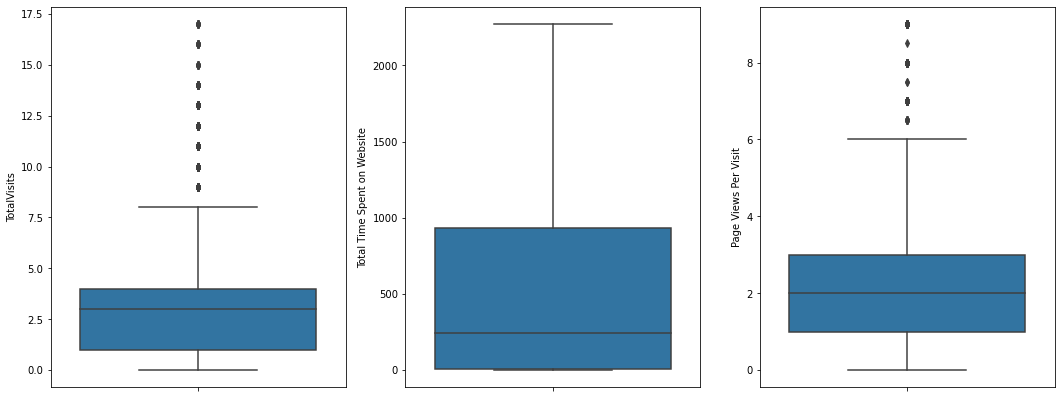

In [89]:
# plotting the continuous variables 

plt.figure(figsize=(18,7))
i = 1
for column in col1:
    plt.subplot(1,3,i)
    sns.boxplot(y=column, data = df)
    i +=1

- we could see few data points above the upper fences of 'TotalVisits' and 'Page Views Per Visit', however, these are continuously formed natural points and seem to be part of our data. So we will not be considering them as outliers

In [90]:
# Visualising the categorical variables

In [91]:
# Categorical type -'Lead Origin','Lead Source','Last Activity','Specialization',
#                    'What is your current occupation','Tags','Last Notable Activity'

In [92]:
cat_col=['Lead Origin','Lead Source','Last Activity','Specialization',
         'What is your current occupation','Tags','Last Notable Activity']

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

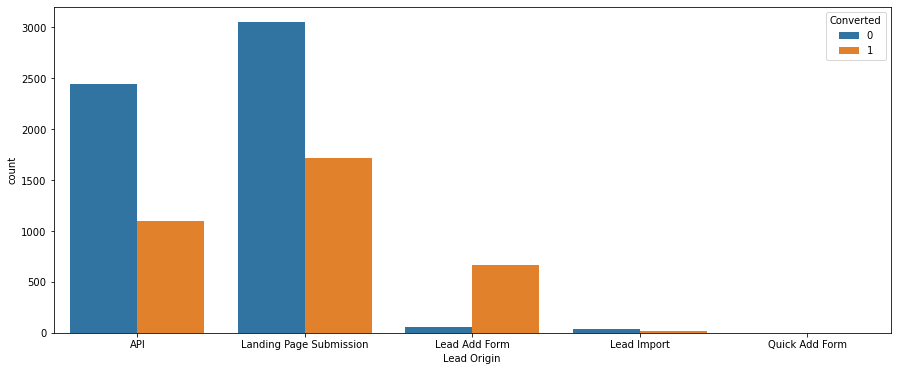

In [93]:
# countplot of 'Lead Origin'
plt.figure(figsize = [15,6])
sns.countplot(x = df['Lead Origin'],hue = df.Converted,  data=df)

-  'Landing page submission' is the most common 'lead origin'  and the number of converted leads is also higher for this category.
- The lead conversion rate is very high among the customers with 'Lead add form' origin.
    

In [94]:
### 'Lead Source'

In [95]:
df['Lead Source'].value_counts()

Google              2877
Direct Traffic      2499
Olark Chat          1753
Organic Search      1092
Reference            533
Welingak Website     142
Referral Sites       117
Others                77
Name: Lead Source, dtype: int64

<AxesSubplot:xlabel='Lead Source', ylabel='count'>

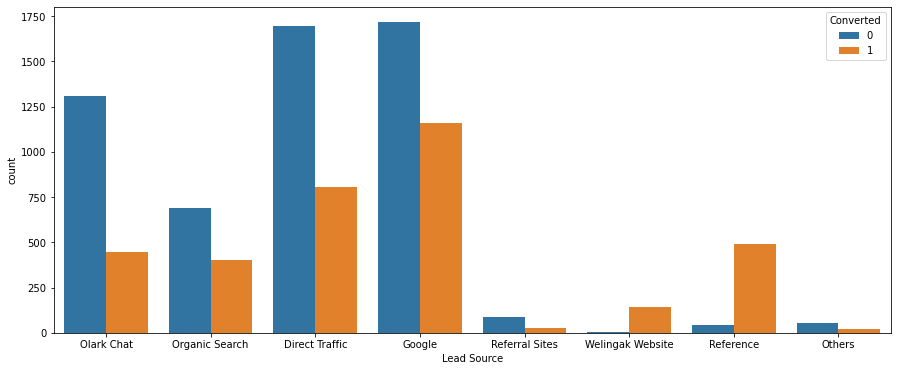

In [96]:
# countplot of 'Lead Source'
plt.figure(figsize = [15,6])
sns.countplot(x = df['Lead Source'], hue = df.Converted, data=df)

- Google and Direct Traffic are the two major lead sources.
- However 'Reference' has the highest lead conversion rate.

In [97]:
### 'Specialization'

<AxesSubplot:xlabel='Specialization', ylabel='count'>

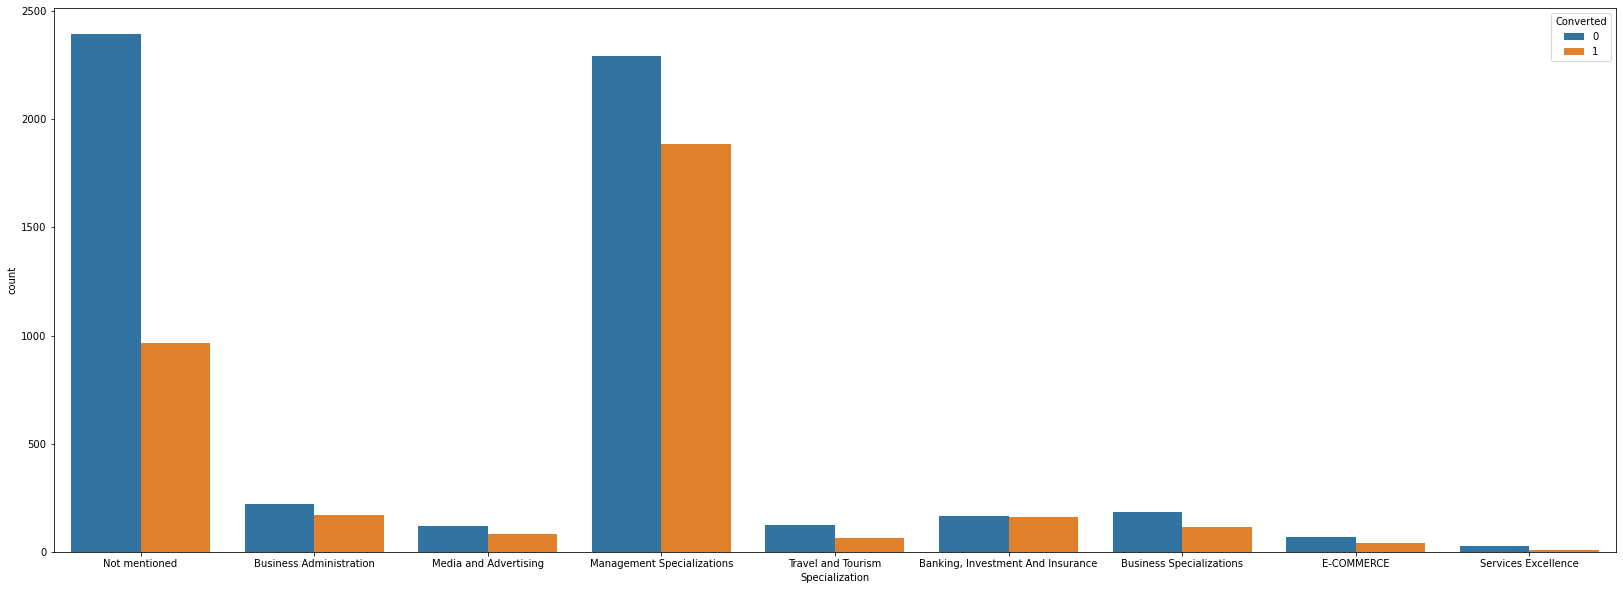

In [98]:
# countplot of 'Specialization'
plt.figure(figsize = [28,10])
sns.countplot(x = df['Specialization'], hue = df.Converted, data=df)

- Most of the customers prefer not to mention their specialization
- Among the customers who have mentioned their specializations,most of them fall into Management domain.

In [99]:
### 'Last Activity'

<AxesSubplot:xlabel='Last Activity', ylabel='count'>

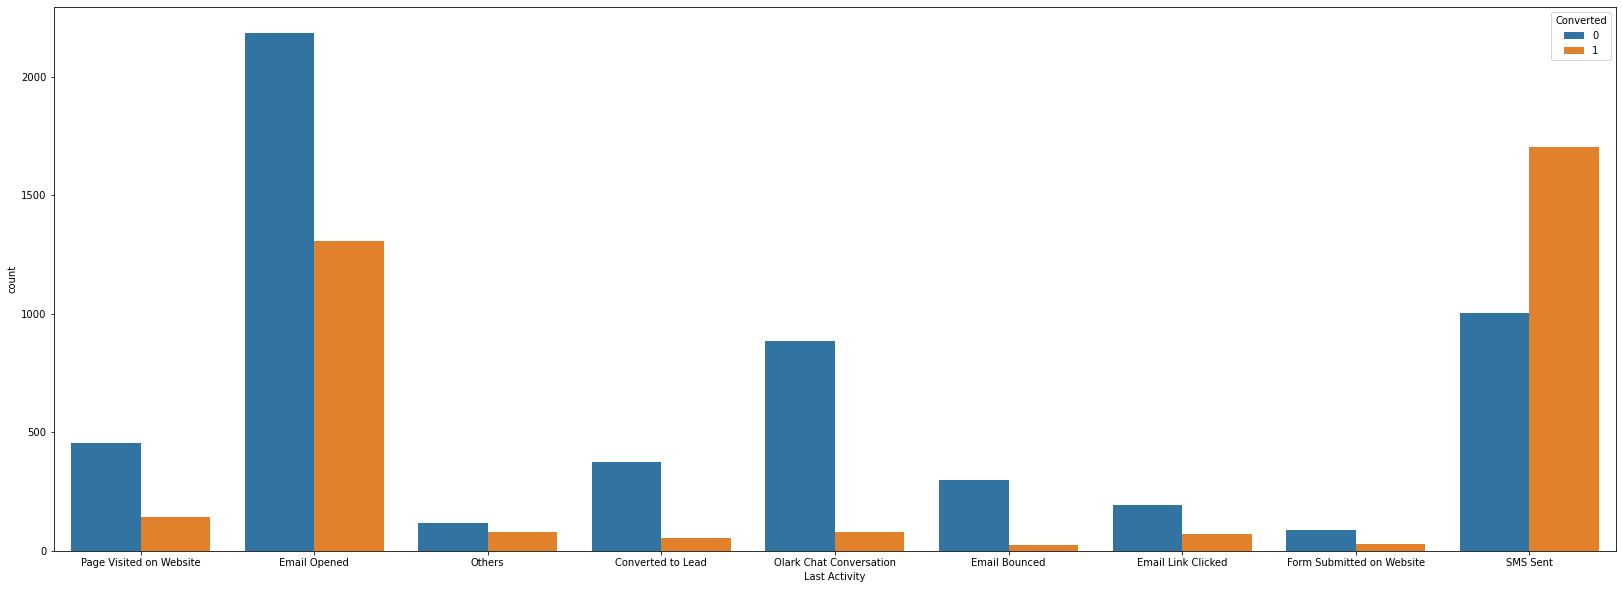

In [100]:
# countplot of 'Last Activity'
plt.figure(figsize = [28,10])
sns.countplot(x = df['Last Activity'], hue = df.Converted, data=df)

- Lead conversion rate is very high among customers whose last activity is 'SMS sent'
- Lead conversion rate is very low among customers with last activity as 'Olark chat conversion'
- Most customer's last activity is 'Email opened'

In [101]:
### 'What is your current occupation'

<AxesSubplot:xlabel='What is your current occupation', ylabel='count'>

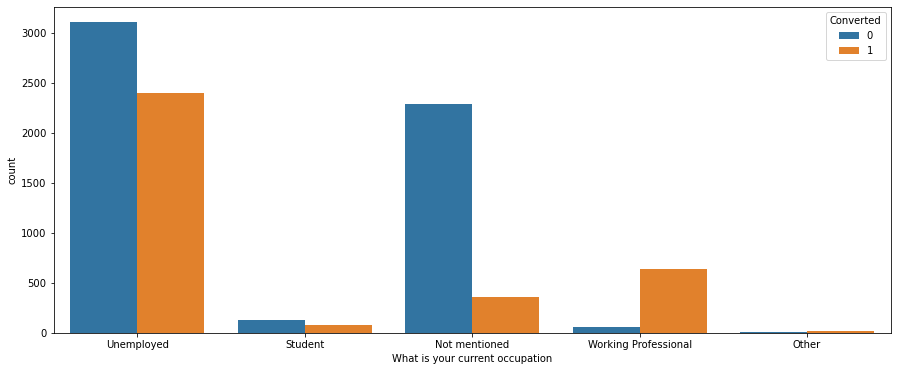

In [102]:
# countplot of 'What is your current occupation'
plt.figure(figsize = [15,6])
sns.countplot(x = df['What is your current occupation'], hue = df.Converted, data=df)

- The number of unemployed people purchasing online courses are high.
- Most of the working professionals who check out the courses end up purchasing them.

In [103]:
### 'Tags'

<AxesSubplot:xlabel='Tags', ylabel='count'>

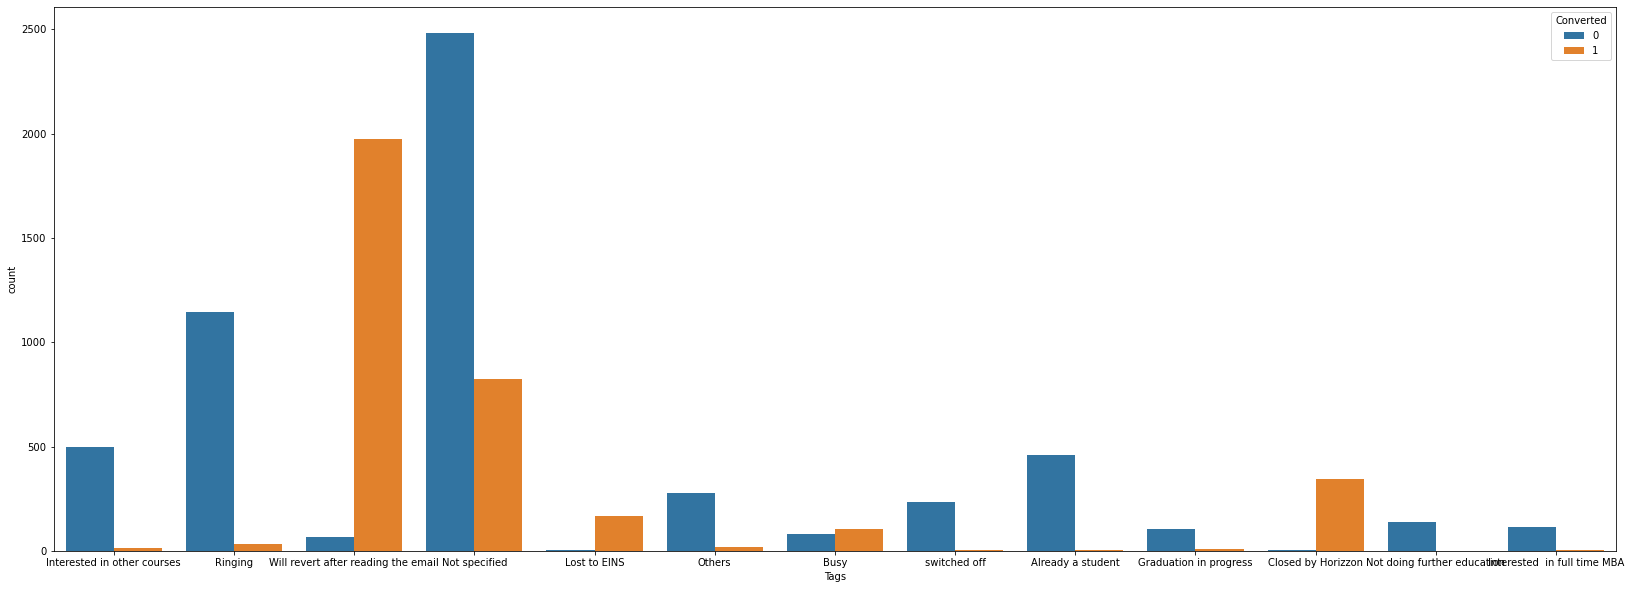

In [104]:
# countplot of 'Tags'
plt.figure(figsize = [28,10])
sns.countplot(x = df['Tags'], hue = df.Converted, data=df)

- Customers who are tagged as 'will revert after reading the email' are more likely to purchase the courses.
 

In [105]:
### 'Last Notable Activity'

<AxesSubplot:xlabel='Last Notable Activity', ylabel='count'>

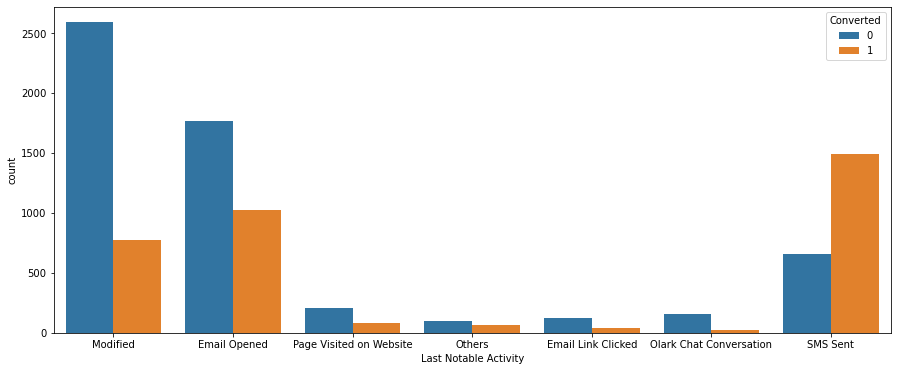

In [106]:
# countplot of 'Last Notable Activity'
plt.figure(figsize = [15,6])
sns.countplot(x = df['Last Notable Activity'], hue = df.Converted, data=df)

- Most of the customers belong to 'modified' category of 'Last Notable Activity'
- The lead conversion rate is very high among people in 'SMS Sent' category

In [107]:
#### Analysis of numerical type + Binary type variables


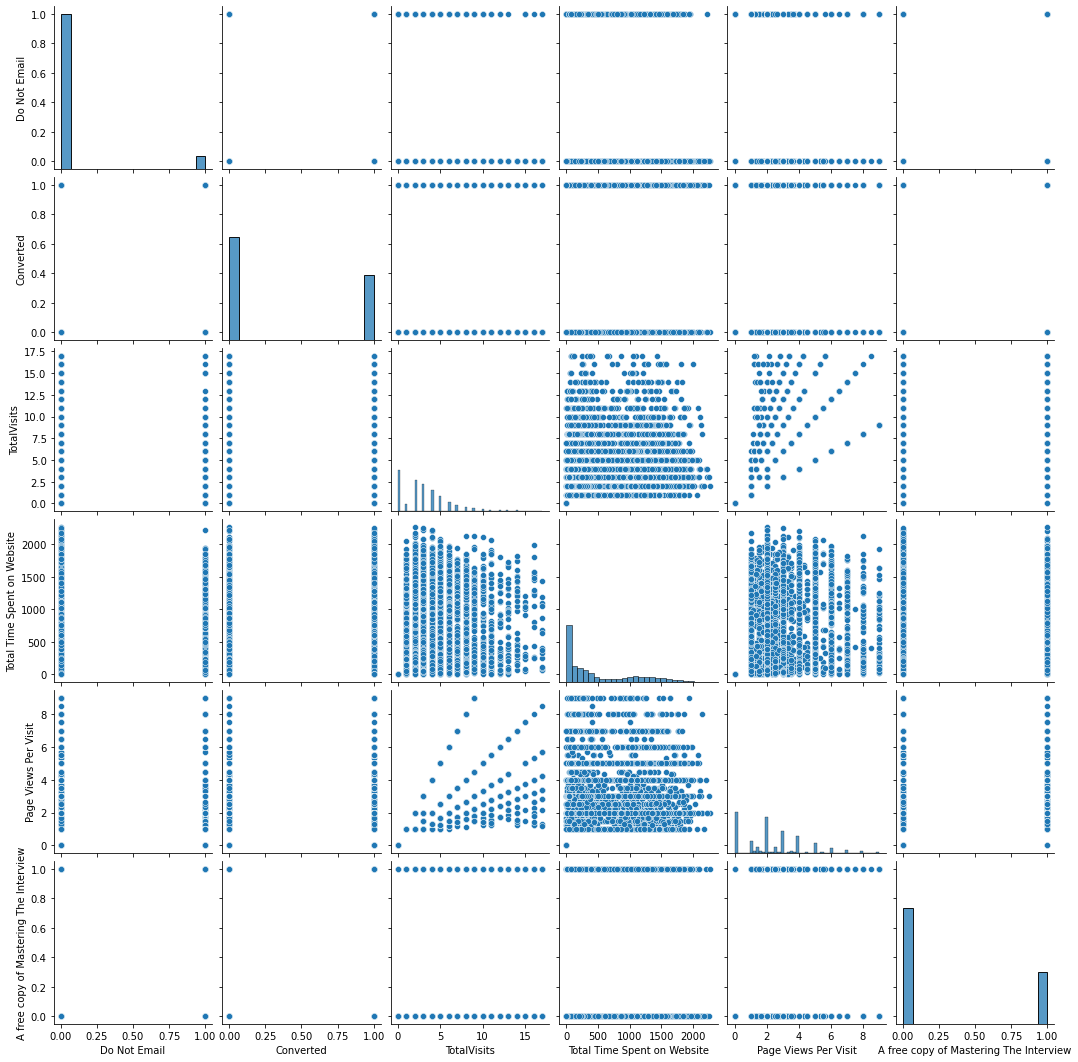

In [108]:
sns.pairplot(df)

- Page Views Per Visit and TotalVisits seem to have a positive correlation

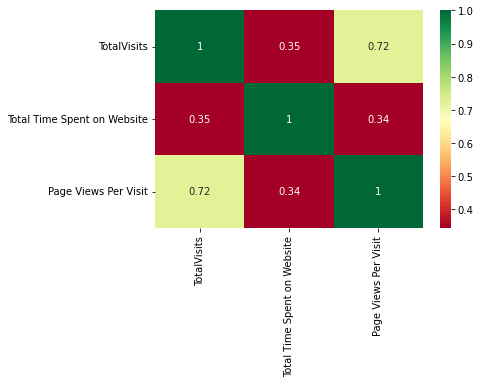

In [109]:
# let's check the correlation coefficients between the continuous variables
sns.heatmap(df[col1].corr(), cmap='RdYlGn', annot = True)
plt.show()

- There is a positive correaltion between Page Views Per Visit and TotalVisits  with a coefficient of 0.72

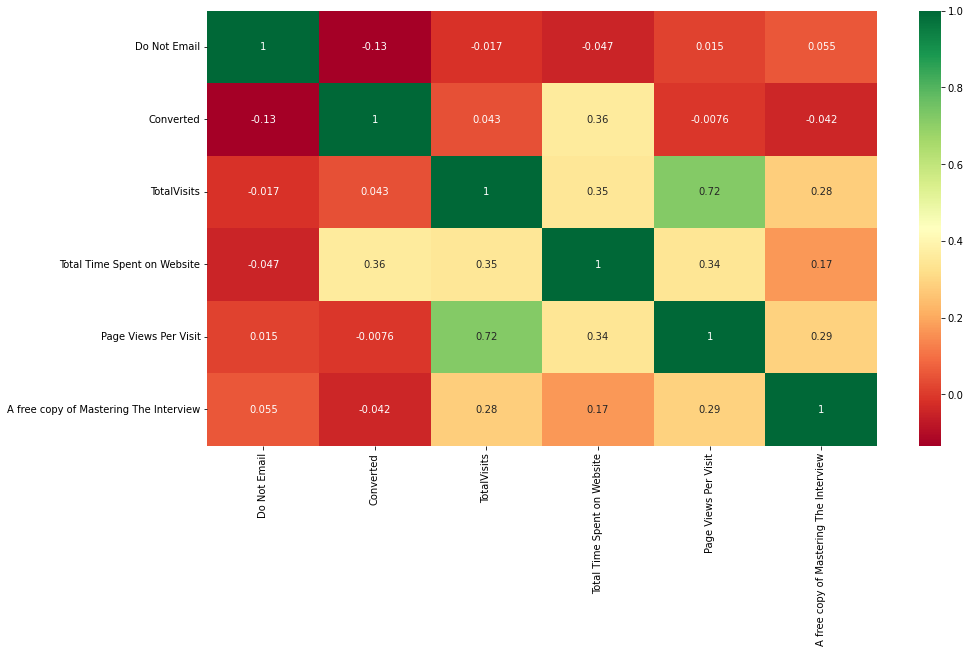

In [110]:
# let's have a look at the correlation coefficients of all the numerical variables(binary+continuous) with each other
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.show()

- Our target variable 'Converted' has a positive correlation with 'Total Time Spent On Website' with a correlation coefficient of 0.36

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

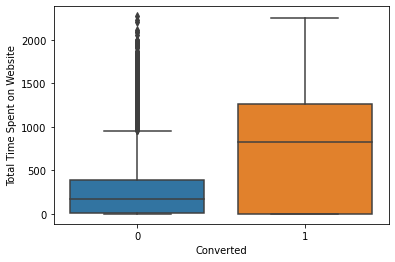

In [111]:
# plotting 'Total Time Spent on Website' against our target variable
sns.boxplot(x = df['Converted'],y= df['Total Time Spent on Website'], data = df)

- The median and 75th percentile of 'Total Time Spent on Website' by converted leads are higher than the 75th percentile of unconverted leads.

# Step 7 : Creating dummy variables for categorical columns

In [112]:
# categorical variables in df
cat_col = df.select_dtypes(include= 'object').columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity'],
      dtype='object')

In [113]:
# Categorical type -'Lead Origin','Lead Source','Last Activity','Specialization',
#                   'What is your current occupation','Tags','Last Notable Activity'

In [114]:
#### creating dummies
#### Since k-1 dummies can take care of all the information contained in categorical variable with k levels,
#### dropping one dummy from dummies created for each column.

In [115]:
#'Lead Origin'

In [116]:
Lead_Origin = pd.get_dummies(df['Lead Origin'],prefix = 'Lead_Origin')
Lead_Origin.drop('Lead_Origin_Quick Add Form',axis = 1,inplace = True)
df = pd.concat([df,Lead_Origin],axis = 1)

In [117]:
# 'Lead Source'

In [118]:
Lead_Source = pd.get_dummies(df['Lead Source'],prefix = 'Lead_Source')
Lead_Source.drop('Lead_Source_Others',axis = 1,inplace = True)
df = pd.concat([df,Lead_Source],axis = 1)

In [119]:
df.shape

(9090, 24)

In [120]:
# 'Last Activity'

In [121]:
Last_Activity = pd.get_dummies(df['Last Activity'],prefix = 'Last_Activity')
Last_Activity.drop('Last_Activity_Others',axis = 1,inplace = True)
df = pd.concat([df,Last_Activity],axis = 1)

In [122]:
# 'Specialization'

In [123]:
Specialization = pd.get_dummies(df.Specialization,prefix = 'Specialization')
Specialization.drop('Specialization_Not mentioned',axis = 1,inplace = True)
df = pd.concat([df,Specialization],axis = 1)

In [124]:
# "What is your current occupation"

In [125]:
wiyco = pd.get_dummies(df['What is your current occupation'],prefix = 'current_occupation')
wiyco.drop('current_occupation_Other',axis = 1,inplace = True)
df = pd.concat([df,wiyco],axis = 1)

In [126]:
# 'Tags'

In [127]:
Tags = pd.get_dummies(df.Tags,prefix = 'Tags')
Tags.drop('Tags_Not specified',axis = 1,inplace = True)
df = pd.concat([df,Tags],axis = 1)

In [128]:
# 'Last Notable Activity'

In [129]:
LNA = pd.get_dummies(df['Last Notable Activity'],prefix = 'Last_Notable_Activity')
LNA.drop('Last_Notable_Activity_Others',axis = 1,inplace = True)
df = pd.concat([df,LNA],axis = 1)

In [130]:
# dropping the categorical columns in df, from which dummies were created 
df.drop(cat_col,axis = 1, inplace = True)

In [131]:
df.shape

(9090, 55)

# Step 8 :Splitting the Data into Training and Testing Sets

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
# Putting response variable to y
y = df.Converted

In [134]:
# Putting feature variables to X
X = df.drop('Converted',axis = 1)

In [135]:
# Splitting the data into train and test
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3 ,random_state=100)

# Step 9 : Feature scaling

In [136]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
 # Numerical continuous- 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'

In [139]:
# Applying scaler() to continuous variables 
#fitting on data
num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num] = scaler.fit_transform(X_train[num])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,current_occupation_Not mentioned,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
302,0,1.336782,-0.428736,0.044021,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6087,1,-1.094877,-0.887355,-1.206716,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,0,0.642022,-0.025151,1.477269,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7656,1,0.989402,-0.241619,2.014065,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3241,0,0.294642,0.897591,-0.492776,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [140]:
df[num].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9090.000000,9090.000000,9090.000000
mean,3.140924,484.243784,2.262836
std,2.881884,547.243973,1.881164
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,4.000000,930.000000,3.000000
max,17.000000,2272.000000,9.000000


In [141]:
X_train[num].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.363000e+03,6.363000e+03,6.363000e+03
mean,-4.933627e-16,-1.354671e-16,2.880333e-16
std,1.000079e+00,1.000079e+00,1.000079e+00
min,-1.094877e+00,-8.873549e-01,-1.206716e+00
25%,-7.474975e-01,-8.671756e-01,-6.699187e-01
50%,-5.273755e-02,-4.360736e-01,-1.331219e-01
75%,6.420224e-01,8.168741e-01,4.036749e-01
max,4.810582e+00,3.280576e+00,3.624456e+00


- Now,none of the variables will have a disproportionate effect on the model’s results.

#### Conversion rate and class imbalance

In [142]:
# y = 'Converted'
# ### Checking the Conversion Rate
conversion_rate =100* sum(y)/len(y)
conversion_rate

38.44884488448845

- We have a lead conversion rate 38.45 
- This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

 # Step 10 : First Training Model

In [143]:
# logistic regression model
lgm1 = sm.GLM(y_train,(sm.add_constant(X_train)),fm = sm.families.Binomial())
lgm1 = lgm1.fit()

In [144]:
lgm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6308
Model Family:                Gaussian   Df Model:                           54
Link Function:               identity   Scale:                        0.058168
Method:                          IRLS   Log-Likelihood:                 48.462
Date:                Tue, 09 Aug 2022   Deviance:                       366.92
Time:                        15:42:49   Pearson chi2:                     367.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.9948      0.259      3.848      0.000       0.488       1.502
Do Not Email                                        -0.0521      0.015     -3.384      0.001      -0.082      -0.022
TotalVisits                                          0.0119      0.005      2.517      0.012       0.003       0.021
Total Time Spent on Website                          0.0743      0.004     20.429      0.000       0.067       0.081
Page Views Per Visit                                -0.0160      0.005     -3.124      0.002      -0.026      -0.006
A free copy of Mastering The Interview              -0.0090      0.010     -0.926      0.355      -0.028       0.010
Lead_Origin_API                                     -0.2977      0.244     -1.219      0.223      -0.776       0.181
Lead_Origin_Landing Page Submission                 -0.3365      0.244     -1.379      0.168      -0.815       0.142
Lead_Origin_Lead Add Form                           -0.1958      0.249     -0.786      0.432      -0.684       0.292
Lead_Origin_Lead Import                             -0.3159      0.255     -1.238      0.216      -0.816       0.184
Lead_Source_Direct Traffic                          -0.0437      0.062     -0.702      0.483      -0.166       0.078
Lead_Source_Google                                  -0.0261      0.062     -0.422      0.673      -0.147       0.095
Lead_Source_Olark Chat                               0.0058      0.063      0.093      0.926      -0.117       0.129
Lead_Source_Organic Search                          -0.0345      0.062     -0.552      0.581      -0.157       0.088
Lead_Source_Reference                               -0.0812      0.072     -1.123      0.262      -0.223       0.061
Lead_Source_Referral Sites                          -0.0119      0.068     -0.176      0.860      -0.145       0.121
Lead_Source_Welingak Website                         0.1708      0.075      2.284      0.022       0.024       0.317
Last_Activity_Converted to Lead                     -0.0656      0.029     -2.260      0.024      -0.122      -0.009
Last_Activity_Email Bounced                         -0.0794      0.030     -2.672      0.008      -0.138      -0.021
Last_Activity_Email Link Clicked                    -0.0282      0.039     -0.726      0.468      -0.104       0.048
Last_Activity_Email Opened                          -0.0544      0.027     -1.995      0.046      -0.108      -0.001
Last_Activity_Form Submitted on Website             -0.0572      0.037     -1.562      0.118      -0.129       0.015
Last_Activity_Olark Chat Conversation               -0.0942      0.028     -3.420      0.001      -0.148      -0.040
Last_Activity_Page Visited on Website    

There are many variables whose p-values are high, implying that these variables are statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we will use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

# Step 11 : Feature Selection Using RFE

let's import RFE and LinearRegression libraries from sklearn for implementing Linear Regression using Recurssive feature elimination

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [146]:
X_train.shape

(6363, 54)

we have 54  varibles in X_train,since it is not feasible to use all the variables, let's consider 20 variables to start with

In [147]:
# Running RFE with the output number of the variable equal to 20

logreg = LogisticRegression()
rfe = RFE(logreg,20)

In [148]:
rfe = rfe.fit(X_train,y_train)

In [149]:
rfe.support_

array([False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False])

In [150]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 15),
 ('Lead_Origin_API', False, 13),
 ('Lead_Origin_Landing Page Submission', False, 12),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 14),
 ('Lead_Source_Direct Traffic', False, 23),
 ('Lead_Source_Google', False, 24),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 19),
 ('Lead_Source_Reference', False, 7),
 ('Lead_Source_Referral Sites', False, 31),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Converted to Lead', False, 9),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Link Clicked', False, 32),
 ('Last_Activity_Email Opened', False, 33),
 ('Last_Activity_Form Submitted on Website', False, 28),
 ('Last_Activity_Olark Chat Conversation', False, 8),
 ('Last_Activity_Page Visited on Website', False, 16)

In [151]:
# selected features
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Bounced', 'Last_Activity_SMS Sent',
       'current_occupation_Not mentioned', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation'],
      dtype='object')

In [152]:
#not selected
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Business Specializations', 'Specialization_E-COMMERCE',
       'Specialization_Management Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'current_o

# Step 12: Model building

In [153]:
# second model

In [154]:
X_train_sm = sm.add_constant(X_train[col])

In [155]:
lgm2 = sm.GLM(y_train,X_train_sm,family= sm.families.Binomial())
lgm2 = lgm2.fit()
lgm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1088.7
Date:                Tue, 09 Aug 2022   Deviance:                       2177.4
Time:                        15:42:55   Pearson chi2:                 1.06e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.1587      0.131     -1.210      0.226      -0.416       0.098
Total Time Spent on Website                       1.0763      0.065     16.595      0.000       0.949       1.203
Lead_Origin_Lead Add Form                         1.4128      0.357      3.957      0.000       0.713       2.113
Lead_Source_Olark Chat                            1.1722      0.160      7.307      0.000       0.858       1.487
Lead_Source_Welingak Website                      3.5043      1.081      3.243      0.001       1.386       5.622
Last_Activity_Email Bounced                      -1.6245      0.470     -3.453      0.001      -2.547      -0.702
Last_Activity_SMS Sent                            1.9273      0.128     15.008      0.000       1.676       2.179
current_occupation_Not mentioned                 -2.2861      0.143    -15.978      0.000      -2.567      -2.006
Tags_Already a student                           -4.6117      0.609     -7.571      0.000      -5.806      -3.418
Tags_Closed by Horizzon                           5.2554      0.742      7.083      0.000       3.801       6.710
Tags_Graduation in progress                      -1.9618      0.461     -4.252      0.000      -2.866      -1.058
Tags_Interested  in full time MBA                -3.3752      0.762     -4.431      0.000      -4.868      -1.882
Tags_Interested in other courses                 -3.6214      0.429     -8.451      0.000      -4.461      -2.782
Tags_Lost to EINS                                 6.2021      0.765      8.109      0.000       4.703       7.701
Tags_Not doing further education                -23.7579   1.18e+04     -0.002      0.998   -2.32e+04    2.32e+04
Tags_Others                                      -3.7036      0.363    -10.199      0.000      -4.415      -2.992
Tags_Ringing                                     -4.6979      0.254    -18.504      0.000      -5.195      -4.200
Tags_Will revert after reading the email          2.9099      0.198     14.704      0.000       2.522       3.298
Tags_switched off                                -5.9016      0.744     -7.927      0.000      -7.361      -4.442
Last_Notable_Activity_Modified                   -1.5293      0.135    -11.320      0.000      -1.794      -1.265
Last_Notable_Activity_Olark Chat Conversation    -1.8991      0.458     -4.150      0.000      -2.796      -1.002
=================================================================================================================
"""

- All the selected features except 'Tags_Not doing further education'  in this model are significant

####  Checking VIFs

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
# Checking for the VIF values of the feature variables.
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

dff = pd.DataFrame()

dff['Features'] = X_train[col].columns
dff['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
dff['VIF'] = round(dff['VIF'],2)
dff = dff.sort_values(by = 'VIF',ascending = False)
dff

,Features,VIF
18,Last_Notable_Activity_Modified,1.95
1,Lead_Origin_Lead Add Form,1.83
6,current_occupation_Not mentioned,1.60
16,Tags_Will revert after reading the email,1.60
2,Lead_Source_Olark Chat,1.53
5,Last_Activity_SMS Sent,1.53
0,Total Time Spent on Website,1.39
8,Tags_Closed by Horizzon,1.32
3,Lead_Source_Welingak Website,1.31
11,Tags_Interested in other courses,1.14


- VIF values of all thes selected features are below 2, indicating that there is no issue of multicollinearity

In [158]:
# Let's remove the insignificant feature 'Tags_Not doing further education' from selected columns
col = col.drop('Tags_Not doing further education')

In [159]:
# Third model

In [160]:
X_train_sm = sm.add_constant(X_train[col])

In [161]:
lgm3 = sm.GLM(y_train,X_train_sm,family= sm.families.Binomial())
lgm3 = lgm3.fit()
lgm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1116.4
Date:                Tue, 09 Aug 2022   Deviance:                       2232.9
Time:                        15:42:56   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3958      0.125     -3.167      0.002      -0.641      -0.151
Total Time Spent on Website                       1.0783      0.064     16.907      0.000       0.953       1.203
Lead_Origin_Lead Add Form                         1.4796      0.360      4.105      0.000       0.773       2.186
Lead_Source_Olark Chat                            1.2632      0.158      7.980      0.000       0.953       1.573
Lead_Source_Welingak Website                      3.7183      1.084      3.429      0.001       1.593       5.843
Last_Activity_Email Bounced                      -1.8892      0.438     -4.317      0.000      -2.747      -1.031
Last_Activity_SMS Sent                            1.9668      0.127     15.532      0.000       1.719       2.215
current_occupation_Not mentioned                 -2.0720      0.138    -15.021      0.000      -2.342      -1.802
Tags_Already a student                           -4.3912      0.609     -7.212      0.000      -5.585      -3.198
Tags_Closed by Horizzon                           5.5389      0.741      7.476      0.000       4.087       6.991
Tags_Graduation in progress                      -1.7200      0.461     -3.735      0.000      -2.623      -0.817
Tags_Interested  in full time MBA                -3.1250      0.760     -4.110      0.000      -4.615      -1.635
Tags_Interested in other courses                 -3.3884      0.428     -7.924      0.000      -4.226      -2.550
Tags_Lost to EINS                                 6.3616      0.768      8.280      0.000       4.856       7.868
Tags_Others                                      -3.4984      0.361     -9.681      0.000      -4.207      -2.790
Tags_Ringing                                     -4.5025      0.251    -17.959      0.000      -4.994      -4.011
Tags_Will revert after reading the email          3.1690      0.195     16.261      0.000       2.787       3.551
Tags_switched off                                -5.7080      0.744     -7.670      0.000      -7.167      -4.249
Last_Notable_Activity_Modified                   -1.6041      0.133    -12.076      0.000      -1.864      -1.344
Last_Notable_Activity_Olark Chat Conversation    -1.8475      0.456     -4.051      0.000      -2.741      -0.954
=================================================================================================================
"""

- All the features in this model are significant as their p value is below 0.05

In [162]:
# Checking for the VIF values of the feature variables.
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

dff = pd.DataFrame()

dff['Features'] = X_train[col].columns
dff['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
dff['VIF'] = round(dff['VIF'],2)
dff = dff.sort_values(by = 'VIF',ascending = False)
dff

,Features,VIF
17,Last_Notable_Activity_Modified,1.90
1,Lead_Origin_Lead Add Form,1.83
15,Tags_Will revert after reading the email,1.60
6,current_occupation_Not mentioned,1.58
2,Lead_Source_Olark Chat,1.53
5,Last_Activity_SMS Sent,1.53
0,Total Time Spent on Website,1.39
3,Lead_Source_Welingak Website,1.31
8,Tags_Closed by Horizzon,1.31
11,Tags_Interested in other courses,1.14


- All the features have VIF value below 2, so there is no issue of multicollinearity here.


- Since all the features are significant and have VIF value below 2,We could proceed with this model as our final model 

- The logistic regression curve gives us the probabilities of lead conversion and leads not being converted. We can get these probabilities by simply using the 'predict' function 

In [163]:
# Getting the predicted values on the train set
y_train_pred = lgm3.predict(X_train_sm)
y_train_pred[:10]

302     0.050688
6087    0.003489
1033    0.395829
7656    0.039467
3241    0.996691
5738    0.033592
7366    0.002272
3680    0.008496
4170    0.996392
43      0.048089
dtype: float64

In [164]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05068849, 0.0034889 , 0.39582923, 0.03946653, 0.99669149,
       0.03359228, 0.00227243, 0.00849627, 0.99639171, 0.04808867])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [165]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final['Prospect_id'] = y_train.index

In [166]:
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect_id
0,0,0.050688,302
1,0,0.003489,6087
2,0,0.395829,1033
3,0,0.039467,7656
4,1,0.996691,3241


The logistic curve gives  just the probabilities and not the actual classification of lead conversion(converted/not converted), we need to find a threshold probability to classify leads as 'converted leads' and 'unconverted leads'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular lead converting is less than 0.5,we would classify it as 'unconverted' and if it's greater than 0.5, we would classify it as 'Converted'

##### Creating new column 'predicted' with 1 if Conversion_prob> 0.5 else 0

In [167]:
y_train_pred_final['predicted'] = y_train_pred_final['Conversion_prob'].apply(lambda x : 1 if x>0.5 else 0)

In [168]:
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect_id,predicted
0,0,0.050688,302,0
1,0,0.003489,6087,0
2,0,0.395829,1033,0
3,0,0.039467,7656,0
4,1,0.996691,3241,1


Since we are classifying the customers into two classes, we will obviously have some errors. The classes of errors that would be there are:

    'Converted' leads being (incorrectly) classified as 'unconverted'
    'unconverted' leads being (incorrectly) classified as 'Converted'

 

To capture these errors, and to evaluate how well the model is, we will use 'Confusion Matrix'.

# Step 13:  Model Evaluation: Accuracy, Sensitivity, and Specificity

In [169]:
from sklearn import metrics

In [170]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3788  147]
 [ 273 2155]]


In [171]:
# confusion matrix

##predicted      unconverted     converted
##actual

#unconverted        3788           147

#converted          273            2155

In [172]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.933993399339934


- We got an accuracy of 93.4%
- Our model is able to  correctly predict the lables  93.4% of the time (in train set)

#### Metrics beyond simply accuracy

In [173]:
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #flase negative

In [174]:
# Let's see the sensitivity of our logistic regression model
TP/(TP+FN)

0.8875617792421746

In [175]:
# Let us calculate specificity
TN/(TN+FP)

0.9626429479034307

- Our model has sensitivity around 88.8% and specificity around 96.3%
- Model is able to correctly predict 88.8% of the converted labels
- Model is able to correctly predict 96.3% of the unconverted labels 

In [176]:
# Calculate false postive rate - predicting converted when lead doesn't get converted.
FP/(FP+TN)

0.03735705209656925

- False positive rate is only ~ 3.7%

In [177]:
# positive predictive value 
TP/(TP+FP)

0.9361424847958297

In [178]:
# Negative predictive value
TN/(TN+FN)

0.9327751785274563

# Step 14:  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [179]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [180]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final['Conversion_prob'],drop_intermediate= False)

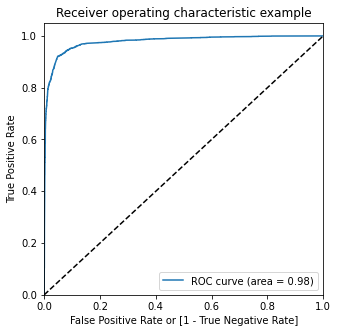

In [181]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final['Conversion_prob'])

- This curve is towards the upper-left corner, there is a larger area under the curve (AUC) indicating that the model 
is good. 

- Our model has very high specificity value but sensitivity value is relatively lower.
- So we need to find an optimum cut-off to have a good balance between these two

# Step 15: Finding Optimal Cut-off Point¶

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [182]:
# Let's create columns with different probability cutoffs 

In [183]:
number = [float(x/10) for x in range(10)]

for i in number:
    y_train_pred_final[i] = y_train_pred_final['Conversion_prob'].apply(lambda j: 1 if j>i else 0)
    
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.050688,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.003489,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.395829,1033,0,1,1,1,1,0,0,0,0,0,0
3,0,0.039467,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.996691,3241,1,1,1,1,1,1,1,1,1,1,1


In [184]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [185]:
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

for i in number:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/ total1 #TN+TP/TOTAL
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.870816  0.974053  0.807116
0.2   0.2  0.917335  0.955107  0.894028
0.3   0.3  0.929907  0.936573  0.925794
0.4   0.4  0.937765  0.922570  0.947141
0.5   0.5  0.933993  0.887562  0.962643
0.6   0.6  0.930693  0.870675  0.967726
0.7   0.7  0.924250  0.843493  0.974079
0.8   0.8  0.917963  0.813015  0.982719
0.9   0.9  0.894861  0.739703  0.990597


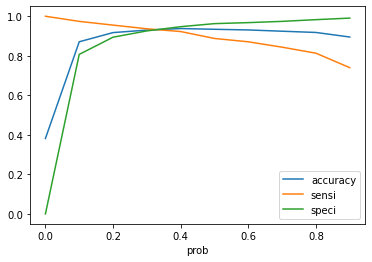

In [186]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x= 'prob',y =['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [187]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Conversion_prob'].apply(lambda x: 1 if x>0.3 else 0)

In [188]:
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.050688,302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.003489,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.395829,1033,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.039467,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.996691,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [189]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.9299072764419299

In [190]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

In [191]:
confusion2

array([[3643,  292],
       [ 154, 2274]], dtype=int64)

In [192]:
TP = confusion2[1,1] # True positive
TN = confusion2[0,0] # True negative
FP = confusion2[0,1] # False positive
FN = confusion2[1,0] # False negative

In [193]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+ FN)

0.9365733113673805

In [194]:
# Let us calculate specificity
TN/float(TN+FP)

0.9257941550190597

- Earlier with 0.5 cut-off
    - accuracy: 93.4%
    - sensitivity : 88.8%
    - specificity : 96.3%
- After choosing the optimum cut-off at 0.3
    - accuracy : 93%
    - sensitivity : 93.7%
    - specificity : 92.6%

In [195]:
# Calculate false postive rate
FP/float(TN+FP)

0.07420584498094028

In [196]:
# Positive predictive value 
TP/float(TP+FP)

0.8862042088854248

In [197]:
# Negative predictive value
TN/float(TN+FN)

0.9594416644719516

#### Model Evaluation: Precision and Recall

In [198]:
from sklearn.metrics import precision_score, recall_score

In [199]:
# Precision Score
precision_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.8862042088854248

In [200]:
# Recall Score
recall_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.9365733113673805

- Our model has very high Precision and Recall values

### Precision and recall tradeoff

In [201]:
from sklearn.metrics import precision_recall_curve

In [202]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

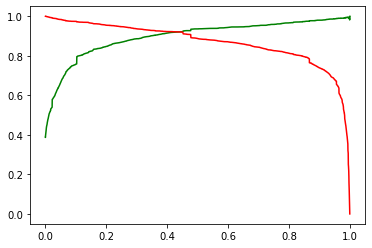

In [203]:
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'r-')
plt.show()

- optimum cut-off is 0.4 from precision- recall view

# Step 16: Making predictions on the test set

In [204]:
# Applying scaler() to continuous variables 
#fitting on data
num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[num] = scaler.transform(X_test[num])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,current_occupation_Not mentioned,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
6906,0,0.294642,1.919395,-0.133122,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1873,0,-0.400118,-0.546142,-0.133122,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
771,0,1.336782,-0.797465,2.550862,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4495,0,0.294642,-0.623190,0.940472,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9061,0,-0.400118,2.392690,-0.133122,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [205]:
# considering only selected columns in model
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_SMS Sent,current_occupation_Not mentioned,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation
6906,1.919395,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1873,-0.546142,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
771,-0.797465,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4495,-0.623190,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9061,2.392690,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [206]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [207]:
y_test_pred = lgm3.predict(X_test_sm)

In [208]:
y_test_pred[:10]

6906    0.998898
1873    0.017804
771     0.003147
4495    0.003795
9061    0.992384
4929    0.321457
2308    0.013300
1034    0.050741
9033    0.003122
7008    0.977798
dtype: float64

In [209]:
# Converting y_test_pred(which is an array) to a dataframe 
y_test_pred_df = pd.DataFrame(y_test_pred)

In [210]:
y_test_pred_df.head()

,0
6906,0.998898
1873,0.017804
771,0.003147
4495,0.003795
9061,0.992384


In [211]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [212]:
# Putting Prospect_ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [213]:
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop = True,inplace =True)
y_test_df.reset_index(drop = True, inplace= True)

In [214]:
#appending both
y_test_pred_final = pd.concat([y_test_df,y_test_pred_df],axis=1)
y_test_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.998898
1,0,1873,0.017804
2,0,771,0.003147
3,0,4495,0.003795
4,1,9061,0.992384


In [215]:
# Renaming the column 
y_test_pred_final = y_test_pred_final.rename(columns = {0:'Conversion_prob'})

In [216]:
#rearranging
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Conversion_prob']]
y_test_pred_final.head()

,Prospect ID,Converted,Conversion_prob
0,6906,1,0.998898
1,1873,0,0.017804
2,771,0,0.003147
3,4495,0,0.003795
4,9061,1,0.992384


In [217]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_prob.apply(lambda x: 1 if x> 0.3 else 0)

In [218]:
y_test_pred_final.head()

,Prospect ID,Converted,Conversion_prob,final_predicted
0,6906,1,0.998898,1
1,1873,0,0.017804,0
2,771,0,0.003147,0
3,4495,0,0.003795,0
4,9061,1,0.992384,1


In [219]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.final_predicted)

0.9328932893289329

- Our model has an accuracy of ~93.3% on the test set

In [220]:
# let's have a look at the confusion matrix
confusion3 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
confusion3 

array([[1552,  108],
       [  75,  992]], dtype=int64)

In [221]:
TP = confusion3[1,1] 
TN = confusion3[0,0]
FP = confusion3[0,1]
FN = confusion3[1,0]

In [222]:
# Let's see the sensitivity of our logistic regression model on test set
TP/(TP+FN)

0.92970946579194

In [223]:
# Let us calculate specificity of our logistic regression model on test set
TN/(TN+FP)

0.9349397590361446

- On the test set Model's
    - accuracy : 93.3%
    - sensitivity : 93%
    - specificity : 93.5%


In [224]:
# False positive rate
FP/(TN+FP)

0.06506024096385542

In [225]:
# Positive predictive value 
TP/(TP+FP)

0.9018181818181819

In [226]:
# Negative predictive value
TN/(TN+FN)

0.9539028887523049

# Step 17: Adding lead score to the data file

In [227]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,current_occupation_Not mentioned,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [228]:
# scaling continuous variables
num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df[num] = scaler.transform(df[num])
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,current_occupation_Not mentioned,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0,-1.094877,-0.887355,-1.206716,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0.642022,0.349083,0.135277,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,1,-0.400118,1.923064,-0.133122,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,-0.747497,-0.327839,-0.669919,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,1,-0.400118,1.732278,-0.669919,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [229]:
# considering only selected columns in model
df = df[col]
df.shape

(9090, 19)

In [230]:
df_sm = sm.add_constant(df)

Making predictions 

In [231]:
df_pred_score = lgm3.predict(df_sm)
df_pred_score[:10]

0    0.006170
1    0.010752
2    0.992209
3    0.001052
4    0.954225
5    0.022633
6    0.969425
7    0.022633
8    0.036120
9    0.035235
dtype: float64

In [232]:
# adding lead score for every lead in the dataframe
df['Lead_score'] = round(100*df_pred_score)

In [233]:
df.head()

,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_SMS Sent,current_occupation_Not mentioned,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Lead_score
0,-0.887355,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1.0
1,0.349083,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
2,1.923064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,99.0
3,-0.327839,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0
4,1.732278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,95.0


In [234]:
#describing lead_score
df.Lead_score.describe()

count    9090.000000
mean       38.133993
std        43.143688
min         0.000000
25%         1.000000
50%         9.000000
75%        96.000000
max       100.000000
Name: Lead_score, dtype: float64

<AxesSubplot:ylabel='Lead_score'>

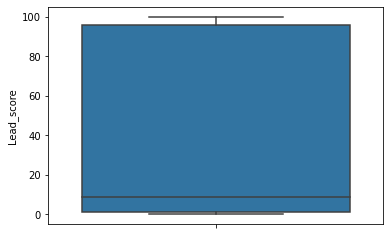

In [235]:
# boxplot of lead_score
sns.boxplot(y= df.Lead_score)

- Every lead has a lead score between 0 and 100
- Leads with very high lead score belong to hot leads, who are most likely to be converted.


# Conclusions

- Our model has 93% accuracy,93.7% sensitivity and 92.6% specificity on training set
- Final model has 93.3%  accuracy,93% sensitivity and 93.5% specificity on test set
- Variables which helps most in predicting lead conversion in our model are
    - Tags_Lost to EINS (coef 6.3616)
    - Tags_switched off (coef -5.7080)
    - Tags_Closed by Horizzon (coef 5.5389)
    - Tags_Ringing (coef -4.5025)
    - Tags_Already a student (coef -4.3912)
    - Lead_Source_Welingak Website (coef 3.7183)
- The Model seems to predict the Conversion Rate very well,so the sales team can make good calls based on this model.
    

    


X education can use our model and give a lead score for every leads. Once the leads have been scored the sales team can focus on leads with scores above 30(since our probability cut off was 0.3) to ensure higher lead conversion.
           
 Sales team doesn't want to miss calling leads tagged as Lost to EINS (coef  6.3616),Closed by Horizon (coef 5.5389) or lead source with Welingak Website (coef 3.7183) as they have higher coefficient values in our model. Higher coefficient values of these dummy variables indicate that there is a higher chance of lead conversion among leads with these dummies.
Sales team may avoid calling leads who are tagged as switched off (coef -5.7080),Ringing (coef -4.5025) or Already a student (coef -4.3912),as their coefficient values are highly negative in our model and they will affect the conversion probability negatively. 
